In [106]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import toolz as tz
import os 
from google.colab import drive
drive.mount('/content/drive')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cpu is available.


In [107]:
file_path = "/content/drive/MyDrive/AI4GoodProject/Sensors.csv"
Ny_Home_Df = pd.read_csv(file_path, low_memory=False)
Ny_Home_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [108]:
print("Shape of the data: {} --> n_rows = {}, n_cols = {}".format(Ny_Home_Df.shape, Ny_Home_Df.shape[0],Ny_Home_Df.shape[1]))

Shape of the data: (503911, 32) --> n_rows = 503911, n_cols = 32


In [109]:
Ny_Home_Df.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,0.012433,0.000483,0.000567,0.000000,0.031450,0.001017,0.004067,0.001583,0.003433,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,0.012417,0.000517,0.000550,0.000000,0.031550,0.001033,0.004117,0.001533,0.003450,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,0.012550,0.000483,0.000450,0.000000,0.031733,0.001033,0.004200,0.001550,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,0.012717,0.000467,0.000300,0.000017,0.031767,0.001017,0.004200,0.001567,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,0.013350,0.000367,0.000050,0.000000,0.031667,0.001017,0.004200,0.001617,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [110]:
Ny_Home_Df.tail(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503901,1452128301,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,0.013517,0.000500,0.000183,0.000017,0.032017,0.000983,0.003750,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503902,1452128302,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,0.013483,0.000450,0.000133,0.000033,0.032117,0.001000,0.003800,0.001000,0.003200,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503903,1452128303,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,0.013450,0.000483,0.000117,0.000017,0.032167,0.000983,0.003783,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503904,1452128304,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,0.013433,0.000467,0.000117,0.000033,0.032283,0.001017,0.003800,0.001017,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
Ny_Home_Df = Ny_Home_Df[0:-1] # Last row seems invalid

In [112]:
Ny_Home_Df.tail(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503900,1452128300,1.522583,0.003200,1.522583,0.000067,0.023033,0.627233,0.041767,0.005283,0.008433,0.013533,0.000467,0.000167,0.000017,0.031967,0.000967,0.003783,0.000950,0.003200,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503901,1452128301,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,0.013517,0.000500,0.000183,0.000017,0.032017,0.000983,0.003750,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503902,1452128302,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,0.013483,0.000450,0.000133,0.000033,0.032117,0.001000,0.003800,0.001000,0.003200,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503903,1452128303,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,0.013450,0.000483,0.000117,0.000017,0.032167,0.000983,0.003783,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503904,1452128304,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,0.013433,0.000467,0.000117,0.000033,0.032283,0.001017,0.003800,0.001017,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [113]:
Ny_Home_Df.iloc[np.r_[0:5, -5:0]]

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [114]:
Ny_Home_Df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [115]:
Ny_Home_Df.columns = [col.replace(' [kW]', '') for col in Ny_Home_Df.columns]
Ny_Home_Df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [116]:
Ny_Home_Df.columns = [col.replace('time', 'sensor-time') for col in Ny_Home_Df.columns]
Ny_Home_Df.columns

Index(['sensor-time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [117]:
Ny_Home_Df['All_Furnace'] = Ny_Home_Df[['Furnace 1','Furnace 2']].sum(axis=1)
Ny_Home_Df['All_Kitchen'] = Ny_Home_Df[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

In [118]:
Ny_Home_Df.astype({'sensor-time': 'int32'}).dtypes

sensor-time              int32
use                    float64
gen                    float64
House overall          float64
Dishwasher             float64
Furnace 1              float64
Furnace 2              float64
Home office            float64
Fridge                 float64
Wine cellar            float64
Garage door            float64
Kitchen 12             float64
Kitchen 14             float64
Kitchen 38             float64
Barn                   float64
Well                   float64
Microwave              float64
Living room            float64
Solar                  float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
All_Furn

In [119]:
Ny_Home_Df.iloc[:, 0]

0         1451624400
1         1451624401
2         1451624402
3         1451624403
4         1451624404
             ...    
503905    1452128305
503906    1452128306
503907    1452128307
503908    1452128308
503909    1452128309
Name: sensor-time, Length: 503910, dtype: object

In [120]:
import time 
print(Ny_Home_Df['sensor-time'].iloc[0])
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(Ny_Home_Df['sensor-time'].iloc[0]))))
#Ny_Home_Df["sensor-time"] = Ny_Home_Df["sensor-time"].dt.strftime("%Y-%m-%d %H:%M:%S")
#Ny_Home_Df['sensor-time'] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(Ny_Home_Df.iloc[:, 0]))
#print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(Ny_Home_Df.iloc[:, 0])))

1451624400
 start  2016-01-01 05:00:00


In [121]:
ime_index = pd.date_range('2016-01-01 05:00', periods=len(Ny_Home_Df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
Ny_Home_Df = Ny_Home_Df.set_index(time_index)

In [122]:
#time_index = pd.date_range('2016-01-01 05:00', periods=len(Ny_Home_Df),  freq='min')  
#time_index = pd.DatetimeIndex(time_index)
#newtimedf=time_index.to_frame(index=False, name='newtime')

In [123]:
#Ny_Home_Df['newtime'] = newtimedf['newtime'].values

In [124]:
#Ny_Home_Df['newtime']= pd.to_datetime(Ny_Home_Df['newtime'])
#timeinfo = Ny_Home_Df['newtime'].dt.time
#dateinfo= Ny_Home_Df['newtime'].dt.date

In [125]:
#Ny_Home_Df['DATE'] = pd.to_datetime(dateinfo.values)
#Ny_Home_Df['TIME'] = timeinfo

In [126]:
Ny_Home_Df.info

<bound method DataFrame.info of                     sensor-time       use  ...  All_Furnace  All_Kitchen
2016-01-01 05:00:00  1451624400  0.932833  ...     0.082617     0.000189
2016-01-01 05:01:00  1451624401  0.934333  ...     0.084533     0.000189
2016-01-01 05:02:00  1451624402  0.931817  ...     0.083017     0.000206
2016-01-01 05:03:00  1451624403  1.022050  ...     0.175417     0.000217
2016-01-01 05:04:00  1451624404  1.139400  ...     0.300917     0.000261
...                         ...       ...  ...          ...          ...
2016-12-16 03:25:00  1452128305  1.601233  ...     0.727683     0.000211
2016-12-16 03:26:00  1452128306  1.599333  ...     0.729050     0.000200
2016-12-16 03:27:00  1452128307  1.924267  ...     1.060117     0.000200
2016-12-16 03:28:00  1452128308  1.978200  ...     1.116033     0.000217
2016-12-16 03:29:00  1452128309  1.990950  ...     1.128833     0.000217

[503910 rows x 34 columns]>

In [127]:
#def getMonth(s):
 # return s.split("-")[1]

#def getDay(s):
 # return s.split("-")[2]

#def getYear(s):
 # return s.split("-")[0]

#def getYearMonth(s):
#  return s.split("-")[1]+"-"+s.split("-")[2]

In [91]:
#Ny_Home_Df['year']= Ny_Home_Df['DATE'].apply(lambda x: getYear(str(x)))
#Ny_Home_Df['month']= Ny_Home_Df['DATE'].apply(lambda x: getMonth(str(x)))
#Ny_Home_Df['day']= Ny_Home_Df['DATE'].apply(lambda x: getDay(x))
#Ny_Home_Df['YearMonth']= Ny_Home_Df['DATE'].apply(lambda x: getYearMonth(x))

In [128]:
Ny_Home_Df

,sensor-time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,All_Furnace,All_Kitchen
2016-01-01 05:00:00,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.082617,0.000189
2016-01-01 05:01:00,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.084533,0.000189
2016-01-01 05:02:00,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.083017,0.000206
2016-01-01 05:03:00,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.175417,0.000217
2016-01-01 05:04:00,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.300917,0.000261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:25:00,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.727683,0.000211
2016-12-16 03:26:00,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000200
2016-12-16 03:27:00,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000200
2016-12-16 03:28:00,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000217


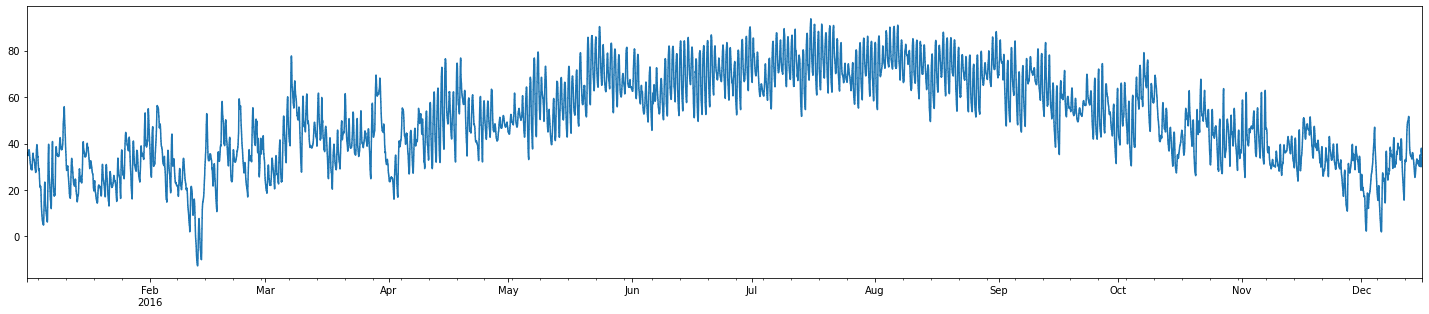

In [93]:
Ny_Home_Df['temperature'].plot(figsize=(25,5))

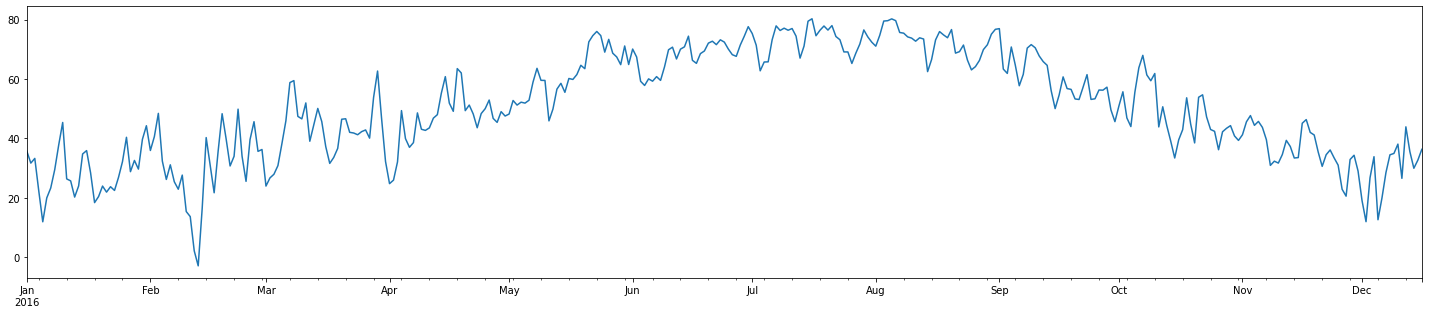

In [94]:
Ny_Home_Df['temperature'].resample(rule='D').mean().plot(figsize=(25,5))

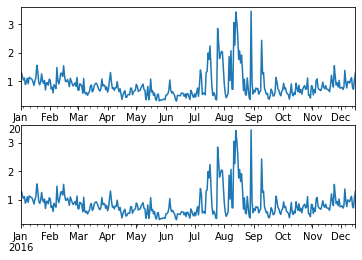

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=1)
Ny_Home_Df['use'].resample('D').mean().plot(ax=axes[0])
Ny_Home_Df['House overall'].resample('D').mean().plot(ax=axes[1])

In [96]:
Ny_Home_Df.describe

<bound method NDFrame.describe of                     sensor-time       use       gen  ...       DATE      TIME  month
2016-01-01 05:00:00  1451624400  0.932833  0.003483  ... 2016-01-01  05:00:00     01
2016-01-01 05:01:00  1451624401  0.934333  0.003467  ... 2016-01-01  05:01:00     01
2016-01-01 05:02:00  1451624402  0.931817  0.003467  ... 2016-01-01  05:02:00     01
2016-01-01 05:03:00  1451624403  1.022050  0.003483  ... 2016-01-01  05:03:00     01
2016-01-01 05:04:00  1451624404  1.139400  0.003467  ... 2016-01-01  05:04:00     01
...                         ...       ...       ...  ...        ...       ...    ...
2016-12-16 03:25:00  1452128305  1.601233  0.003183  ... 2016-12-16  03:25:00     12
2016-12-16 03:26:00  1452128306  1.599333  0.003233  ... 2016-12-16  03:26:00     12
2016-12-16 03:27:00  1452128307  1.924267  0.003217  ... 2016-12-16  03:27:00     12
2016-12-16 03:28:00  1452128308  1.978200  0.003217  ... 2016-12-16  03:28:00     12
2016-12-16 03:29:00  1452128309

In [129]:
#df.drop(columns=['B', 'C'])
Ny_Home_Df.columns
Ny_Home_Df = Ny_Home_Df.drop(columns=['House overall'])
#Ny_Home_Df.shape

In [130]:
Ny_Home_Df = Ny_Home_Df.drop(columns=['summary', 'icon'])
Ny_Home_Df.shape

(503910, 31)

In [131]:
Ny_Home_Df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
Ny_Home_Df['cloudCover'] = Ny_Home_Df['cloudCover'].astype('float')
Ny_Home_Df['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

In [132]:
Ny_Home_Df.columns

Index(['sensor-time', 'use', 'gen', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'Solar', 'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'All_Furnace', 'All_Kitchen'],
      dtype='object')

In [134]:
Ny_Home_Df = Ny_Home_Df.resample('H').mean() ## Trying with hourly time
Ny_Home_Df.shape

(8399, 30)

In [136]:
import sklearn.preprocessing

# standardize with a standard scaler
Ny_Home_Df_standardized = Ny_Home_Df.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ['temperature','humidity', 'visibility','windSpeed', 'pressure', 'cloudCover', 'windBearing', 'precipIntensity','precipProbability']
for feature in features:
  Ny_Home_Df_standardized[feature] = scaler.fit_transform(Ny_Home_Df_standardized[[feature]].values)
display(Ny_Home_Df_standardized)

,use,gen,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,All_Furnace,All_Kitchen
2016-01-01 05:00:00,1.044130,0.003307,0.000064,0.134631,0.258557,0.241814,0.037861,0.063351,0.013046,0.000605,0.000206,0.000009,0.038881,0.001042,0.021652,0.001505,0.003307,-0.765123,-0.229723,0.469845,29.264667,0.074345,0.637487,1.856384,0.790133,-0.240099,24.383333,-0.350461,0.393188,0.000274
2016-01-01 06:00:00,0.918167,0.003422,0.000099,0.236570,0.220138,0.043294,0.075522,0.112942,0.012836,0.000554,0.000181,0.000013,0.039181,0.001021,0.004216,0.001618,0.003422,-0.780433,-0.279704,0.469845,29.364667,-0.008787,0.416611,1.856384,0.816225,-0.240099,23.866000,-0.350461,0.456708,0.000250
2016-01-01 07:00:00,0.714736,0.003448,0.000043,0.099424,0.272746,0.043416,0.059486,0.007184,0.013299,0.000578,0.000134,0.000014,0.034439,0.001014,0.004246,0.001629,0.003448,-0.804191,-0.264193,0.469845,29.034000,-0.039582,0.325592,1.856384,0.763380,-0.240099,23.469000,-0.350461,0.372170,0.000242
2016-01-01 08:00:00,0.960013,0.003447,0.000138,0.375153,0.241217,0.065014,0.060412,0.007045,0.012925,0.000616,0.000177,0.000013,0.034195,0.001016,0.004274,0.001634,0.003447,-0.809585,-0.124591,0.469845,30.395333,-0.032865,-0.246101,1.856384,0.620700,-0.240099,24.202667,-0.350461,0.616370,0.000269
2016-01-01 09:00:00,0.639836,0.003439,0.000060,0.153000,0.190842,0.043392,0.035106,0.007143,0.013220,0.000661,0.000125,0.000010,0.031830,0.001014,0.004258,0.001650,0.003439,-0.800700,-0.115973,0.469845,29.673333,-0.061632,0.082876,1.413586,0.625654,-0.240099,24.423333,-0.350461,0.343842,0.000265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 23:00:00,1.096999,0.004137,0.000075,0.286136,0.486331,0.041853,0.044236,0.008119,0.012814,0.000546,0.000168,0.000018,0.032249,0.000992,0.003084,0.001261,0.004137,-0.720138,0.247682,0.079664,29.392667,-0.446837,1.155810,2.090181,-0.125729,-0.205604,28.414667,-0.300821,0.772467,0.000244
2016-12-16 00:00:00,1.276585,0.004109,0.000059,0.297272,0.498734,0.041711,0.050492,0.105546,0.012526,0.000527,0.000095,0.000017,0.030902,0.040522,0.003001,0.001236,0.004109,-0.689021,0.297663,-0.250521,29.813667,-0.465445,1.356246,0.297736,-0.046793,0.158446,29.379167,0.778856,0.796006,0.000213
2016-12-16 01:00:00,1.260231,0.004141,0.000100,0.340873,0.482545,0.041921,0.049140,0.123134,0.012743,0.000566,0.000181,0.000019,0.031992,0.000999,0.003104,0.001276,0.004141,-0.749500,0.707852,-0.426103,28.988000,-0.528660,1.037851,0.297736,-0.044150,0.739324,30.864333,2.814108,0.823418,0.000255
2016-12-16 02:00:00,1.100358,0.004164,0.000085,0.272381,0.434319,0.041900,0.050063,0.065749,0.012957,0.000554,0.000167,0.000013,0.031680,0.000993,0.003111,0.001270,0.004164,-0.793935,0.892265,-0.594762,29.601667,-0.581632,0.181458,0.297736,-0.104261,0.720074,31.118333,2.814108,0.706701,0.000245


In [139]:
weather_features = Ny_Home_Df[['use', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room','temperature','humidity', 'visibility','windSpeed', 'pressure', 'cloudCover', 'windBearing', 'precipIntensity','precipProbability']]
energy_use = Ny_Home_Df['use']
weather_features = weather_features['2016-01-02 05:00:00':'2016-12-02 05:00:00']
weather_features['yesterday_use'] = energy_use['2016-01-01 05:00:00':'2016-12-01 05:00:00'].values
weather_features['energy_use'] = Ny_Home_Df['use']['2016-01-02 05:00:00':'2016-12-02 05:00:00']    

In [138]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()

In [ ]:
from sklearn.model_selection import train_test_split

def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(weather_features, 'energy_use', 0.2)

In [176]:
def sliding_windows_mutli_features(data, seq_length):
    x = []
    y = []
    print("sliding",data.shape[0])
    for i in range((data.shape[0])-seq_length-1):
        _x = data[i:(i+seq_length),2:] ## 16 columns for features  
        _y = data[(i+seq_length),0:2] ## column 0 contains the labbel
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [165]:
weather_features

,use,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,temperature,humidity,visibility,windSpeed,pressure,cloudCover,windBearing,precipIntensity,precipProbability,yesterday_use,energy_use
2016-01-02 05:00:00,1.349401,0.424022,0.086879,0.441028,0.050920,0.079340,0.007259,0.012903,0.000539,0.000372,0.000013,0.034679,0.001013,0.004237,0.001609,29.640000,0.600000,10.000000,8.036667,1014.231667,0.193333,273.333333,0.0,0.0,1.044130,1.349401
2016-01-02 06:00:00,0.769654,0.106298,0.175861,0.213868,0.051080,0.005062,0.007033,0.013013,0.000734,0.000179,0.000011,0.034684,0.001014,0.004227,0.001629,28.936000,0.617333,10.000000,8.040000,1014.266000,0.155333,270.400000,0.0,0.0,0.918167,0.769654
2016-01-02 07:00:00,0.784055,0.000297,0.078538,0.281094,0.050790,0.124657,0.007157,0.013333,0.000406,0.000183,0.000009,0.037314,0.001008,0.004265,0.001648,29.119000,0.629000,9.829000,8.004000,1014.423000,0.141000,267.300000,0.0,0.0,0.714736,0.784055
2016-01-02 08:00:00,0.994467,0.000144,0.411047,0.288568,0.055174,0.004940,0.006982,0.012775,0.000732,0.000171,0.000009,0.034340,0.001017,0.004217,0.001617,29.523333,0.630000,9.987333,7.272000,1014.262667,0.298667,260.466667,0.0,0.0,0.960013,0.994467
2016-01-02 09:00:00,0.778566,0.000236,0.187449,0.221069,0.051423,0.092081,0.007048,0.013016,0.000498,0.000154,0.000010,0.034356,0.001007,0.004226,0.001610,29.115000,0.639667,10.000000,7.500333,1014.404667,0.271333,249.366667,0.0,0.0,0.639836,0.778566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-02 01:00:00,1.006829,0.000092,0.179170,0.215615,0.318142,0.063832,0.007864,0.013085,0.000596,0.000248,0.000007,0.034177,0.001018,0.003122,0.003356,4.583333,0.443333,10.000000,10.090000,1022.726667,0.020000,309.000000,0.0,0.0,1.102628,1.006829
2016-12-02 02:00:00,1.141596,0.000082,0.134111,0.264624,0.479383,0.050711,0.007881,0.013192,0.000627,0.000273,0.000008,0.038338,0.001014,0.003139,0.001697,3.797167,0.464333,10.000000,9.534167,1023.872667,0.030000,308.283333,0.0,0.0,1.217952,1.141596
2016-12-02 03:00:00,0.990323,0.000009,0.020906,0.063814,0.453986,0.024535,0.007808,0.018146,0.000736,0.000204,0.000008,0.035545,0.001043,0.031297,0.001821,3.162333,0.493000,10.000000,8.140000,1025.133000,0.030000,295.733333,0.0,0.0,1.001768,0.990323
2016-12-02 04:00:00,0.733471,0.000020,0.055469,0.063562,0.091161,0.045336,0.007983,0.013085,0.000588,0.000064,0.000008,0.034391,0.041968,0.003241,0.001583,2.440167,0.508167,10.000000,6.666500,1026.408167,0.013667,295.266667,0.0,0.0,0.472154,0.733471


In [177]:
# Select only the features and the target for prediction  
data_with_features = weather_features[['use', 'Dishwasher','temperature','humidity', 'visibility','windSpeed', 'pressure', 'cloudCover', 'windBearing', 'precipIntensity','precipProbability']].to_numpy()             

#data_with_features = DF_normlized['sales'].to_numpy().reshape(-1,1)
data_with_features.shape

(8041, 11)

In [ ]:
x_train = data_with_features.iloc[:7000]
x_train.info()
#isna()
x_test = data_with_features.iloc[7000:, :-1] 

y_train = weather_features['energy_use']
y_train = y_train[:5000]

x_test = weather_features.iloc[5000:,:-1]
y_test = weather_features['energy_use']
y_test = y_test[5000:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [173]:
 _y = data_with_features[7,0:2]

In [174]:
_y

array([1.61103861e+00, 1.73611150e-04])

In [178]:
x , y = sliding_windows_mutli_features(data_with_features,seq_length=28)
print("X_data shape is",x.shape)
print("y_data shape is",y.shape)

sliding 8041
X_data shape is (8012, 28, 9)
y_data shape is (8012, 2)


In [148]:
y

array([[1.61103861],
       [1.39428083],
       [0.72421   ],
       ...,
       [1.14159556],
       [0.99032333],
       [0.73347056]])

In [179]:

scaler = get_scaler('minmax')
#X_train_arr = scaler.fit_transform(x)
#X_val_arr = scaler.transform(X_val)
#X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y)
#y_val_arr = scaler.transform(y_val)
#y_test_arr = scaler.transform(y_test)

ValueError: ignored

In [180]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64
train_features = torch.Tensor(x)
train_targets = torch.Tensor(y)
#val_features = torch.Tensor(X_val_arr)
#val_targets = torch.Tensor(y_val_arr)
#test_features = torch.Tensor(X_test_arr)
#test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
#val = TensorDataset(val_features, val_targets)
#test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
#val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
#test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
#test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

In [181]:
import torch
import torch.nn as nn

In [182]:
def get_model(model, model_params):
    models = {
        "lstm": LSTMModel
        
    }
    return models.get(model.lower())(**model_params)

In [183]:
class LSTMModel(nn.Module):
    """LSTMModel class extends nn.Module class and works as a constructor for LSTMs.

       LSTMModel class initiates a LSTM module based on PyTorch's nn.Module class.
       It has only two methods, namely init() and forward(). While the init()
       method initiates the model with the given input parameters, the forward()
       method defines how the forward propagation needs to be calculated.
       Since PyTorch automatically defines back propagation, there is no need
       to define back propagation method.

       Attributes:
           hidden_dim (int): The number of nodes in each layer
           layer_dim (str): The number of layers in the network
           lstm (nn.LSTM): The LSTM model constructed with the input parameters.
           fc (nn.Linear): The fully connected layer to convert the final state
                           of LSTMs to our desired output shape.

    """
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates a LSTM instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [184]:
from datetime import datetime

In [194]:
class Optimization:
    """Optimization is a helper class that allows training, validation, prediction.

    Optimization is a helper class that takes model, loss function, optimizer function
    learning scheduler (optional), early stopping (optional) as inputs. In return, it
    provides a framework to train and validate the models, and to predict future values
    based on the models.

    Attributes:
        model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
        loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
        optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        train_losses (list[float]): The loss values from the training
        val_losses (list[float]): The loss values from the validation
        last_epoch (int): The number of epochs that the models is trained
    """
    def __init__(self, model, loss_fn, optimizer):
        """
        Args:
            model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
            loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
            optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        """
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
        
    def train_step(self, x, y):
        """The method train_step completes one step of training.

        Given the features (x) and the target values (y) tensors, the method completes
        one step of the training. First, it activates the train mode to enable back prop.
        After generating predicted values (yhat) by doing forward propagation, it calculates
        the losses by using the loss function. Then, it computes the gradients by doing
        back propagation and updates the weights by calling step() function.

        Args:
            x (torch.Tensor): Tensor for features to train one step
            y (torch.Tensor): Tensor for target values to calculate losses

        """
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, batch_size=64, n_epochs=50, n_features=1):
        """The method train performs the model training

        The method takes DataLoaders for training and validation datasets, batch size for
        mini-batch training, number of epochs to train, and number of features as inputs.
        Then, it carries out the training by iteratively calling the method train_step for
        n_epochs times. If early stopping is enabled, then it  checks the stopping condition
        to decide whether the training needs to halt before n_epochs steps. Finally, it saves
        the model in a designated file path.

        Args:
            train_loader (torch.utils.data.DataLoader): DataLoader that stores training data
            val_loader (torch.utils.data.DataLoader): DataLoader that stores validation data
            batch_size (int): Batch size for mini-batch training
            n_epochs (int): Number of epochs, i.e., train steps, to train
            n_features (int): Number of feature columns

        """
        model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
              if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t "
                )

        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        """The method evaluate performs the model evaluation

        The method takes DataLoaders for the test dataset, batch size for mini-batch testing,
        and number of features as inputs. Similar to the model validation, it iteratively
        predicts the target values and calculates losses. Then, it returns two lists that
        hold the predictions and the actual values.

        Note:
            This method assumes that the prediction from the previous step is available at
            the time of the prediction, and only does one-step prediction into the future.

        Args:
            test_loader (torch.utils.data.DataLoader): DataLoader that stores test data
            batch_size (int): Batch size for mini-batch training
            n_features (int): Number of feature columns

        Returns:
            list[float]: The values predicted by the model
            list[float]: The actual values in the test set.

        """
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    def plot_losses(self):
        """The method plots the calculated loss values for training and validation
        """
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

[1/50] Training loss: 0.3844	 
[2/50] Training loss: 0.3585	 
[3/50] Training loss: 0.3544	 
[4/50] Training loss: 0.3616	 
[5/50] Training loss: 0.3573	 
[6/50] Training loss: 0.3563	 
[7/50] Training loss: 0.3557	 
[8/50] Training loss: 0.3556	 
[9/50] Training loss: 0.3560	 
[10/50] Training loss: 0.3555	 
[50/50] Training loss: 0.3489	 


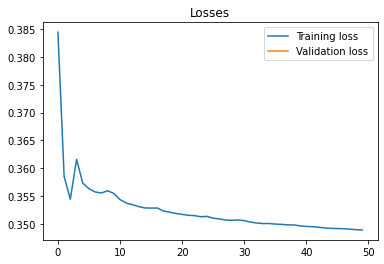

NameError: ignored

In [196]:
import torch.optim as optim

input_dim = 9
output_dim = 2
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 50
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

In [ ]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
df_result

,value,prediction
2016-09-26 05:00:00,0.560670,0.566446
2016-09-26 06:00:00,0.411009,0.568214
2016-09-26 07:00:00,0.431663,0.571500
2016-09-26 08:00:00,0.522666,0.577543
2016-09-26 09:00:00,0.415875,0.599666
...,...,...
2016-12-02 01:00:00,1.006829,0.746680
2016-12-02 02:00:00,1.141595,0.766237
2016-12-02 03:00:00,0.990323,0.711545
2016-12-02 04:00:00,0.733471,0.608529


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab' # or 'notebook' or 'colab'

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot


def plot_predictions(df_result):
    data = []
    
    value = go.Scatter(
        x=df_result.index,
        y=df_result.value,
        mode="lines",
        name="values",
        marker=dict(),
        text=df_result.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)
   
    prediction = go.Scatter(
        x=df_result.index,
        y=df_result.prediction,
        mode="lines",
        line={"dash": "dot"},
        name='predictions',
        marker=dict(),
        text=df_result.index,
        opacity=0.8,
    )
    data.append(prediction)
    
    layout = dict(
        title="Predictions vs Actual Values for the dataset",
        xaxis=dict(title="Time", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )
    figure = make_subplots(rows=1, cols=1)
    figure.append_trace(prediction,row = 1,col = 1)
    #figure.append_trace(value,row = 1,col = 1)
    fig = dict(data=data, layout=layout)
    iplot(fig)
   # figure.show()
    
# Set notebook mode to work in offline
#pyo.init_notebook_mode()

plot_predictions(df_result)